<a href="https://colab.research.google.com/github/stixmal/praktikum_project_ds/blob/main/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BF%D0%B5%D1%80%D1%81%D0%BF%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B3%D0%BE%20%D1%82%D0%B0%D1%80%D0%B8%D1%84%D0%B0%20%D0%B4%D0%BB%D1%8F%20%D1%82%D0%B5%D0%BB%D0%B5%D0%BA%D0%BE%D0%BC%20%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B8/tariff_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение перспективного тарифа для телеком компании

Клиентам федерального оператора сотовой связи предлагается два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Сделаем предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализируем поведение клиентов и сделаем вывод — какой тариф лучше. Источники: `/datasets/calls.csv`, `/datasets/internet.csv`, `/datasets/messages.csv`, `/datasets/tariffs.csv`, `/datasets/users.csv`.


## Описание тарифов

### Тариф "Смарт"

#### 1. Ежемесячная плата: 550 рублей


#### 2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика


#### 3. Стоимость услуг сверх тарифного пакета:


+ минута разговора: 3 рубля


+ сообщение: 3 рубля


+ 1 Гб интернет-трафика: 200 рублей


### Тариф "Ультра"

#### 1. Ежемесячная плата: 1950 рублей


#### 2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика


#### 3. Стоимость услуг сверх тарифного пакета:


+ минута разговора: 1 рубля


+ сообщение: 1 рубля


+ 1 Гб интернет-трафика: 150 рублей

## Оглавление

### [1. Ознакомление с общей информацией](#1) <a id='10'></a>   

### [2. Подготовка данных](#2) <a id='20'></a>
+ [Замена типа данных и исправление ошибок](#2.1)  


+ [Подсчёт количества сделанных звонков и израсходованных минут разговора по месяцам](#2.2)


+ [Подсчёт количества отправленных сообщений по месяцам](#2.3)


+ [Объём израсходованного интернет-трафика по месяцам](#2.4)


+ [Подсчёт помесячной выручки с каждого пользователя](#2.5)

### [3. Анализ данных](#3) <a id='30'></a>
+ [Описание поведения клиентов и расчёт статистических параметров](#3.1)  



### [4. Проверка гипотез](#4) <a id='40'></a>
+ [Различие средней выручки пользователей тарифов "Ультра" и "Смарт"](#4.1)


+ [Различие средней выручки пользователей из Москвы от других пользователей](#4.2)


### [5. Общий вывод](#5) <a id='50'></a>
***

## 1. Ознакомление с общей информацией <a id='1'></a>   [^](#10) 

Изучим данные о 500 пользователях федерального оператора сотовой связи.

In [ ]:
# импорт библиотеки pandas
import pandas as pd    

# импорт библиотеки mathplot
import matplotlib.pyplot as plt

# импорт библиотеки math
import math as mt

# импорт библиотеки numpy
import numpy as np  

# импорт библиотеки статистики
from scipy import stats as st

# импорт модуля display
from IPython.display import display  

Прочитаем файлы и сохраним их в переменных.

## `users`

In [ ]:
# чтение файла с данными
df_users = pd.read_csv('/datasets/users.csv')

# вызов таблицы на экран
display(df_users)  

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Разберём какую информацию содержат столбцы.

* **user_id** — уникальный идентификатор пользователя
* **age** — возраст пользователя (годы)
* **churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* **city** — город проживания пользователя
* **first_name** — имя пользователя
* **last_name** — фамилия пользователя
* **reg_date** — дата подключения тарифа (день, месяц, год)
* **tariff** — название тарифного плана

## `calls`

In [ ]:
# чтение файла с данными
df_calls = pd.read_csv('/datasets/calls.csv')

# вызов таблицы на экран
display(df_calls)  

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


Разберём какую информацию содержат столбцы.

* **id** — уникальный номер звонка
* **call_date** — дата звонка
* **duration** — длительность звонка в минутах
* **user_id** — идентификатор пользователя, сделавшего звонок

## `messages`

In [ ]:
# чтение файла с данными
df_messages = pd.read_csv('/datasets/messages.csv')

# вызов таблицы на экран
display(df_messages)  

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


Разберём какую информацию содержат столбцы.

* **id** — уникальный номер сообщения
* **message_date** — дата сообщения
* **user_id** — идентификатор пользователя, отправившего сообщение

## `internet`

In [ ]:
# чтение файла с данными
df_internet = pd.read_csv('/datasets/internet.csv')

# вызов таблицы на экран
display(df_internet)  

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Разберём какую информацию содержат столбцы.

* **id** — уникальный номер сессии
* **mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)
* **session_date** — дата интернет-сессии
* **user_id** — идентификатор пользователя

## `tariffs`

In [ ]:
# чтение файла с данными
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

# вызов таблицы на экран
display(df_tariffs)  

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Разберём какую информацию содержат столбцы.

* **messages_included** — количество сообщений в месяц, включённых в абонентскую плату
* **mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* **minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату
* **rub_monthly_fee** — ежемесячная абонентская плата в рублях
* **rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
* **rub_per_message** — стоимость отправки сообщения сверх тарифного пакета
* **rub_per_minute** — стоимость минуты разговора сверх тарифного пакета
* **tariff_name** — название тарифа

###  Выводы
Первичное ознакомление с таблицами показало несоответствие некоторых типов данных и наличие лишних столбцов. В дальнейшем уберём эти неточности для лучшего анализа и ответов на поставленные вопросы.
***

## 2. Подготовка данных <a id='2'></a>   [^](#10)

* ### Замена типа данных и исправление ошибок <a id='2.1'></a> [^](#10)

## `users`

In [ ]:
# просмотр информации о таблице 
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Изменили объектный тип данных на формат datetime.

In [ ]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

Привели к нижнему регистру с объектными типами данных.

In [ ]:
# перевод к нижнему регистру 
df_users['city'] = df_users['city'].str.lower()

df_users['first_name'] = df_users['first_name'].str.lower()

df_users['last_name'] = df_users['last_name'].str.lower()

In [ ]:
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra
1,1001,41,NaN,москва,иван,ежов,2018-11-01,smart
2,1002,59,NaN,стерлитамак,евгений,абрамович,2018-06-17,smart
3,1003,23,NaN,москва,белла,белякова,2018-08-17,ultra
4,1004,68,NaN,новокузнецк,татьяна,авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,иркутск,авксентий,фокин,2018-08-28,ultra
496,1496,36,NaN,вологда,трифон,блохин,2018-01-27,smart
497,1497,32,NaN,челябинск,каролина,агеева,2018-10-09,smart
498,1498,68,2018-10-25,владикавказ,всеволод,акимчин,2018-07-19,smart


## `calls`

In [ ]:
# просмотр информации о таблице 
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Изменили название столбца.

In [ ]:
# изменили название id
df_calls.columns = ['id_calls', 'call_date', 'duration', 'user_id']

Изменили объектный тип данных на формат datetime.

In [ ]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

# создание столбца с номером месяца звонка
df_calls['month_calls'] = df_calls['call_date'].dt.month

Так как оператор всегда округляет вверх значения независимо от проговоренных минут, нам необходимо также округлить до верхнего целого.

In [ ]:
# округление потраченных минут
df_calls['duration'] = df_calls['duration'].apply(lambda row: int(mt.ceil(row)))
df_calls

,id_calls,call_date,duration,user_id,month_calls
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


## `messages`

In [ ]:
# просмотр информации о таблице 
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Изменили название столбца.

In [ ]:
# изменили название id
df_messages.columns = ['id_message', 'message_date', 'user_id']

Изменили объектный тип данных на формат datetime.

In [ ]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

# создание столбца с номером месяца отправленного сообщения
df_messages['month_message'] = df_messages['message_date'].dt.month

In [ ]:
# просмотр полученной таблицы
df_messages

,id_message,message_date,user_id,month_message
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


## `internet`

In [ ]:
# просмотр информации о таблице 
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Удалили столбец, дублирующий индексы таблицы.

In [ ]:
df_internet = df_internet.drop('Unnamed: 0', axis=1)

Изменили название столбца.

In [ ]:
# изменили название id
df_internet.columns = ['id_internet', 'mb_used', 'session_date', 'user_id']

Изменили объектный тип данных на формат datetime.

In [ ]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

# создание столбца с номером месяца интернет сессии
df_internet['month_session'] = df_internet['session_date'].dt.month

Округлили до целого числа мегабайтов.

In [ ]:
# округление потраченных мегабайт
df_internet['mb_used'] = df_internet['mb_used'].apply(lambda row: int(mt.ceil(row)))

In [ ]:
# просмотр полученной таблицы
df_internet

,id_internet,mb_used,session_date,user_id,month_session
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,319,2018-10-03,1499,10
149392,1499_153,491,2018-12-14,1499,12
149393,1499_154,0,2018-10-27,1499,10
149394,1499_155,1247,2018-11-26,1499,11


## `tariff`

In [ ]:
# просмотр информации о таблице 
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Изменили название столбца.

In [ ]:
df_tariffs.columns = [col.replace('tariff_name', 'tariff') for col in df_tariffs.columns]

Для большего удобства и дальнейшего анализа соединили таблицы `users` и `tariff`.

In [ ]:
df = df_users.merge(df_tariffs, how='left')
df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1001,41,NaN,москва,иван,ежов,2018-11-01,smart,50,15360,500,550,200,3,3
2,1002,59,NaN,стерлитамак,евгений,абрамович,2018-06-17,smart,50,15360,500,550,200,3,3
3,1003,23,NaN,москва,белла,белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
4,1004,68,NaN,новокузнецк,татьяна,авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,65,NaN,иркутск,авксентий,фокин,2018-08-28,ultra,1000,30720,3000,1950,150,1,1
496,1496,36,NaN,вологда,трифон,блохин,2018-01-27,smart,50,15360,500,550,200,3,3
497,1497,32,NaN,челябинск,каролина,агеева,2018-10-09,smart,50,15360,500,550,200,3,3
498,1498,68,2018-10-25,владикавказ,всеволод,акимчин,2018-07-19,smart,50,15360,500,550,200,3,3


***

* ### Подсчёт количества сделанных звонков и израсходованных минут разговора по месяцам <a id='2.2'></a> [^](#10)

При подсчёте минут длительность нулевых звонков оставили без внимания, так как данный факт никак не влияет на потребление услуг из-за отсутствия тарификации.

In [ ]:
# сортировка по суммарному времени и количеству совершённых звонков за месяц каждым пользователем за исключением нулевых звонков
df_calls_month = df_calls.query('duration != 0').pivot_table(index=[ 'user_id', 'month_calls'], \
                                                             values='duration', aggfunc=['count', 'sum'])

# переименование осей таблицы
df_calls_month.columns = ['count_call', 'sum_duration']

df_calls_month.rename_axis(['user_id', 'month'], axis=0, inplace=True) 
df_calls_month

count_call  sum_duration
user_id month                          
1000    5              17           159
        6              28           172
        7              41           340
        8              42           408
        9              46           466
...                   ...           ...
1498    10             30           247
1499    9               8            70
        10             44           449
        11             62           612
        12             56           492

[3168 rows x 2 columns]

***

* ### Подсчёт количества отправленных сообщений по месяцам <a id='2.3'></a> [^](#10)

Посчитали количество отправленных пользователями сообщений за месяц.

In [ ]:
# подсчет количества отправленных сообщений за месяц каждым пользователем
df_message_month = df_messages.pivot_table(index=[ 'user_id', 'month_message'], values='id_message', aggfunc=['count'])

# переименование мультииндексов и столбцов таблицы
df_message_month.columns = ['count_message']

df_message_month.rename_axis(['user_id', 'month'], axis=0, inplace=True) 
df_message_month

count_message
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
...                      ...
1498    10                42
1499    9                 11
        10                48
        11                59
        12                66

[2717 rows x 1 columns]

***

* ### Объём израсходованного интернет-трафика по месяцам <a id='2.4'></a> [^](#10)

In [ ]:
# подсчет суммарного трафика за каждый месяц пользователями
df_internet_month = df_internet.pivot_table(index=[ 'user_id', 'month_session'], values='mb_used', aggfunc=['sum'])

# переименование осей таблицы
df_internet_month.columns = ['sum_mb']

df_internet_month.rename_axis(['user_id', 'month'], axis=0, inplace=True) 
df_internet_month

sum_mb
user_id month        
1000    5        2256
        6       23257
        7       14016
        8       14070
        9       14581
...               ...
1498    10      20604
1499    9        1848
        10      17809
        11      17984
        12      13077

[3203 rows x 1 columns]

***

Соединили все сгруппированные таблицы с количеством потребляемых услуг.

In [ ]:
df_group = df_calls_month.merge(df_message_month, on=['user_id', 'month'], how='left')

df_group = df_group.merge(df_internet_month, on=['user_id', 'month'], how='left')

df_group['month'] = df_group.index.get_level_values(1)
df_group

count_call  sum_duration  count_message   sum_mb  month
user_id month                                                         
1000    5              17           159           22.0   2256.0      5
        6              28           172           60.0  23257.0      6
        7              41           340           75.0  14016.0      7
        8              42           408           81.0  14070.0      8
        9              46           466           57.0  14581.0      9
...                   ...           ...            ...      ...    ...
1498    10             30           247           42.0  20604.0     10
1499    9               8            70           11.0   1848.0      9
        10             44           449           48.0  17809.0     10
        11             62           612           59.0  17984.0     11
        12             56           492           66.0  13077.0     12

[3168 rows x 5 columns]

***

* ### Подсчёт помесячной выручки с каждого пользователя <a id='2.5'></a> [^](#10)

Создали общую таблицу для более лучшего расчёта и анализа параметров.

In [ ]:
df = df.merge(df_group, on='user_id', how='left')

In [ ]:
# вызов общей таблицы
df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,count_call,sum_duration,count_message,sum_mb,month
0,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,17.0,159.0,22.0,2256.0,5.0
1,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,28.0,172.0,60.0,23257.0,6.0
2,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,41.0,340.0,75.0,14016.0,7.0
3,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,42.0,408.0,81.0,14070.0,8.0
4,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,46.0,466.0,57.0,14581.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,1498,68,2018-10-25,владикавказ,всеволод,акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,30.0,247.0,42.0,20604.0,10.0
3172,1499,35,NaN,пермь,гектор,корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,8.0,70.0,11.0,1848.0,9.0
3173,1499,35,NaN,пермь,гектор,корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,44.0,449.0,48.0,17809.0,10.0
3174,1499,35,NaN,пермь,гектор,корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,62.0,612.0,59.0,17984.0,11.0


Посчитали помесячную выручку с каждого пользователя.

In [ ]:
# функция для вычисления помесячной выручки с каждого пользователя
def to_fee(row):
    if row['minutes_included'] < row['sum_duration']:
        fee_calls = (row['sum_duration'] - row['minutes_included']) * row['rub_per_minute']
    else:
        fee_calls = 0 
        
    if row['messages_included'] < row['count_message']:
        fee_messages = (row['count_message'] - row['messages_included']) * row['rub_per_message']
    else:
        fee_messages = 0  
        
    if row['mb_per_month_included'] < row['sum_mb']:
        fee_mb = mt.ceil((row['sum_mb'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb']
    else:
        fee_mb = 0
        
    fee_month_total = row['rub_monthly_fee'] + fee_calls + fee_messages + fee_mb
    return fee_month_total

In [ ]:
# создание столбца с общей платой за тариф в месяц
df['fee_month_total'] = df.apply(to_fee, axis=1)
df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,count_call,sum_duration,count_message,sum_mb,month,fee_month_total
0,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,17.0,159.0,22.0,2256.0,5.0,1950.0
1,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,28.0,172.0,60.0,23257.0,6.0,1950.0
2,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,41.0,340.0,75.0,14016.0,7.0,1950.0
3,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,42.0,408.0,81.0,14070.0,8.0,1950.0
4,1000,52,NaN,краснодар,рафаил,верещагин,2018-05-25,ultra,1000,30720,...,1950,150,1,1,46.0,466.0,57.0,14581.0,9.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,1498,68,2018-10-25,владикавказ,всеволод,акимчин,2018-07-19,smart,50,15360,...,550,200,3,3,30.0,247.0,42.0,20604.0,10.0,1750.0
3172,1499,35,NaN,пермь,гектор,корнилов,2018-09-27,smart,50,15360,...,550,200,3,3,8.0,70.0,11.0,1848.0,9.0,550.0
3173,1499,35,NaN,пермь,гектор,корнилов,2018-09-27,smart,50,15360,...,550,200,3,3,44.0,449.0,48.0,17809.0,10.0,1150.0
3174,1499,35,NaN,пермь,гектор,корнилов,2018-09-27,smart,50,15360,...,550,200,3,3,62.0,612.0,59.0,17984.0,11.0,1513.0


###  Выводы
При подготовке данных мы очистили некоторые таблицы от некорректной информации, изменили тип данных, а также предварительно сгруппировав по определённым признакам, рассчитали объём потребляемых услуг пользователями. Сгруппированные таблицы соединили в одну для более наглядного представления.
***

## 3. Анализ данных <a id='3'></a>   [^](#10)

* ### Описание поведения клиентов и расчёт статистических параметров <a id='3.1'></a> [^](#10)

In [ ]:
# создание срезов для разных тарифов
df_ultra = df.query('tariff == "ultra"').reset_index(drop=True)

df_smart = df.query('tariff == "smart"').reset_index(drop=True)

In [ ]:
# функция для расчёта статистических параметров
def to_stat(df, column):
    
    mean = round(df[column].mean(), 2)
    variance = round(np.var(df[column],  ddof=1), 2)
    std = round(np.std(df[column], ddof=1), 2)
    
    return [mean, variance, std]

In [ ]:
# расчёт статистических параметров для разных тарифов и потребляемых услуг
count_df = [df_ultra, df_smart]
count_column = ['sum_duration', 'count_message', 'sum_mb', 'fee_month_total']

list_stat = []

for i in range(len(count_df)):
    for j in range(len(count_column)):
        list_stat.append(to_stat(count_df[i], count_column[j]))      

In [ ]:
# создание таблиц со статистическими параметрами
df_stat_ultra = pd.DataFrame(list_stat[:4], index=['dur_ultra', 'message_ultra', 'mb_ultra', 'fee_month_ultra'],
                      columns=['mean', 'variance', 'std']).T
                       
df_stat_smart = pd.DataFrame(list_stat[4:], index=['dur_smart', 'message_smart', 'mb_smart', 'fee_month_smart'],
                      columns=['mean', 'variance', 'std']).T

In [ ]:
df_stat_ultra      

,dur_ultra,message_ultra,mb_ultra,fee_month_ultra
mean,547.76,60.84,19697.67,2071.67
variance,93338.43,1974.64,99755846.13,145730.09
std,305.51,44.44,9987.78,381.75


In [ ]:
df_stat_smart

,dur_smart,message_smart,mb_smart,fee_month_smart
mean,419.44,38.75,16238.77,1295.12
variance,35718.13,719.82,34511766.69,675326.32
std,188.99,26.83,5874.67,821.78


In [ ]:
# вызов таблицы с параметрами тарифов
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## `ultra`

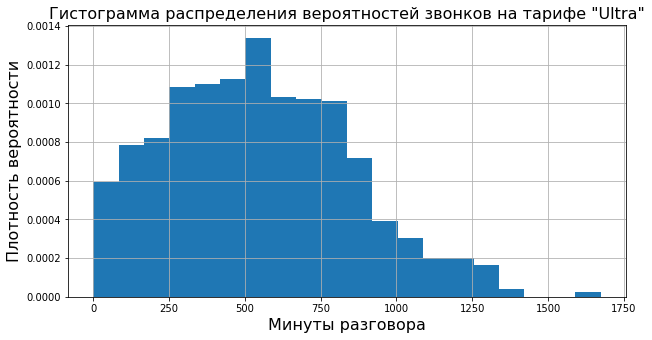

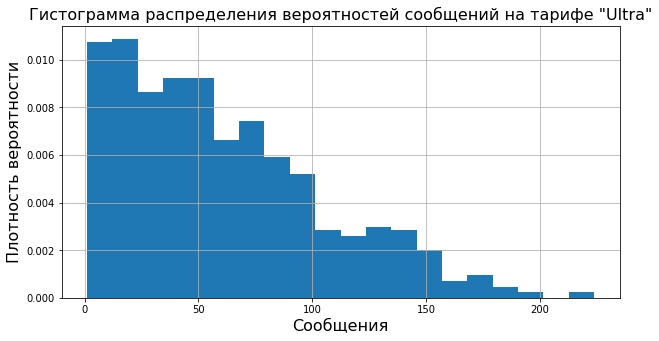

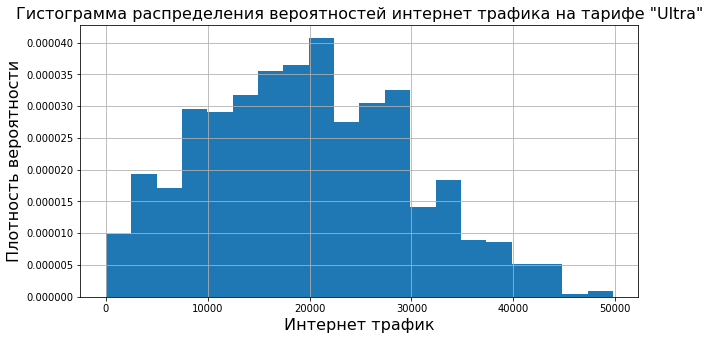

In [ ]:
# построение плотностных гистограмм для тарифа Ultra
name_title_ultra = ['Гистограмма распределения вероятностей звонков на тарифе "Ultra"', 
             'Гистограмма распределения вероятностей сообщений на тарифе "Ultra"', 
              'Гистограмма распределения вероятностей интернет трафика на тарифе "Ultra"']
name_x_ultra = ['Минуты разговора', 'Сообщения', 'Интернет трафик']
name_y_ultra = 'Плотность вероятности'

for i in range(0, 1):
    for j in range(0, 3):
        count_df[i][count_column[j]].hist(density=True, bins=20, figsize=(10, 5))
        plt.xlabel(name_x_ultra[j],  fontsize=16, fontweight='normal')
        plt.ylabel(name_y_ultra, fontsize=16, fontweight='normal')
        plt.title(name_title_ultra[j], fontsize=16, fontweight='normal')
        plt.show()

Как видно при вышепредставленных гистограмм и рассчитанных статистических параметров, пользователи тарифа "Ultra" в среднем потребляют около 550 минут, 60 сообщений и 20 Гб трафика в месяц. Гистограмма минут имеет широкую верхушку, что говорит о существенном различии в потреблении разного числа минут разными пользователями. Большинству пользователям достаточно включённого в тариф количества минут, так как 3000 почти никто не наговаривает.  

Включённые в тариф сообщения (1000 шт.) также с лихвой покрывают потребности клиентов, так как количество 150-200 сообщений в месяц уже являются маловероятными событиями в масштабе всей выборки.  

30 Гб трафика также хватает большинству пользователей, однако мы видим, что есть существенная прослойка людей, которая выбивается за 30 и 40 Гб. После пика в 20 Гб, есть второй около 30. Это говорит о желании людей потратить тот объём трафика, за который они заплатили и выйти "в ноль" к началу следующего расчётного периода.

## `smart`

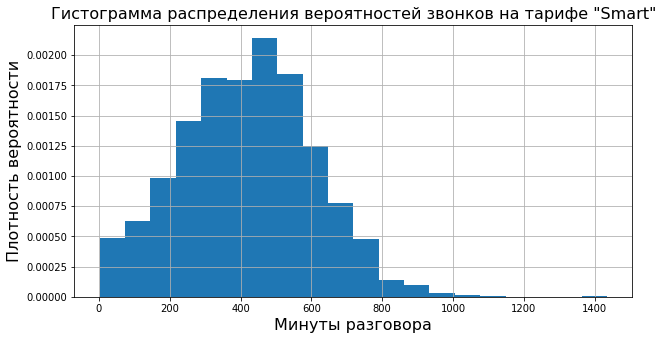

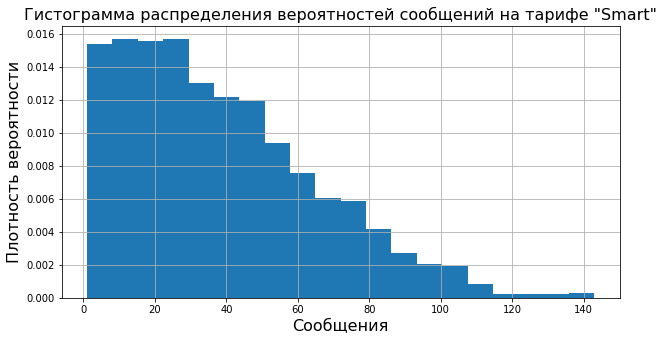

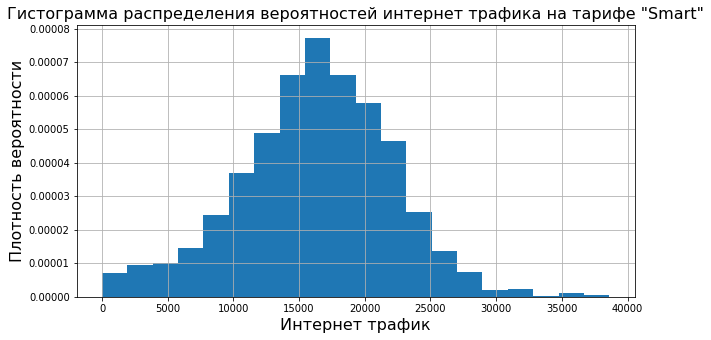

In [ ]:
# построение плотностных гистограмм для тарифа Smart
name_title_smart = ['Гистограмма распределения вероятностей звонков на тарифе "Smart"', 
             'Гистограмма распределения вероятностей сообщений на тарифе "Smart"', 
              'Гистограмма распределения вероятностей интернет трафика на тарифе "Smart"']
name_x_smart = ['Минуты разговора', 'Сообщения', 'Интернет трафик']
name_y_smart = 'Плотность вероятности'

for i in range(1, 2):
    for j in range(0, 3):
        count_df[i][count_column[j]].hist(density=True, bins=20, figsize=(10, 5))
        plt.xlabel(name_x_smart[j],  fontsize=16, fontweight='normal')
        plt.ylabel(name_y_smart, fontsize=16, fontweight='normal')
        plt.title(name_title_smart[j], fontsize=16, fontweight='normal')
        plt.show()

500 минут в месяц, включённые в тариф, являютя неким средним и в выборке тарифа "Smart". Гистограмма минут более пологая относительно среднего, чем на другом тарифе, что говорит о сдерживании в потреблении дополнительного количества минут из-за перерасхода.  

50 сообщений в месяц являются тем минимумом, которым можно довольствоваться на данном тарифе. Видно, что не всем его хватает в полной мере и многим приходится дополнительно оплачивать сверхнормативное потребление.  

Гистограмма трафика немного скошена вправо, т.е. имеется тенденция к увеличению потребления количества Гб. 15 Гб, являясь средним, уже перестают удовлетворять всё большее количество пользователей, и им приходится оплачивать "лишне потреблённые" мегабайты интернета.

###  Выводы
Анализируя потребление у пользователей разных тарифов, можно проследить, что пользователи более дорого тарифа склонны потреблять больше из-за осознания непотребляемости излишне включённого количества минут, сообщений и трафика , а более дешёвого всегда думать о лимите. Однако как показывает средняя плата за тариф "Smart" (1300 р.) и  плата по тарифу (550 р.), пользователи часто переплачивают в более, чем 2 раза. Среднеквадратичное отклонение также покакзывает большой разброс общей платы за данный тариф. Совмещая со скошенностью гистограммы потрябляемых мегабайт, делаем вывод, что, в основном, причиной перерасхода является дополнительно покупаемые Гб. Сегодня человеку легче отказаться от звонков и сообщений, чем от интернета, тем более, что последний даёт гораздо больше в плане коммуникаций.


***

## 4. Проверка гипотез <a id='4'></a>   [^](#10)

* ### Различие средней выручки пользователей тарифов "Ультра" и "Смарт" <a id='4.1'></a> [^](#10)

Сформулировали гипотезы, так чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти. Поэтому:  

- Будем считать для нулевой гипотезы $ H_0 $, что средние выручки пользователей тарифов **"Ультра"** и **"Смарт"** равны.
- Тогда альтернативная гипотеза $ H_1 $ будет звучать как: "Средние выручки пользователей тарифов **"Ультра"** и **"Смарт"** различаются".

Применили статистический тест о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [ ]:
# выборка из первой и второй генеральной совокупности выручки по разным тарифам

sample_1 = df_ultra['fee_month_total']  
sample_2 = df_smart['fee_month_total']  

# проверили методом Бартлетта одинаковость дисперсий двух выборок
from scipy.stats import bartlett
stat, p = bartlett(sample_1, sample_2,)
print('p-значение Бартлетта:', p)

p-значение Бартлетта: 2.4178815605583046e-134


Дисперсии двух выборок различаются.

In [ ]:
# критический уровень статистической значимости, меньше которого отвергнем нулевую гипотезу 
alpha = 0.05

# будем считать дисперсии выборок разными
results = st.ttest_ind(sample_1, sample_2, equal_var = False)   

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")    

p-значение: 7.870022530292764e-242
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что с данной вероятностью средние генеральных совокупностей равны. Из-за ничтожно малого значения этой вероятности, нулевая гипотеза отвергается и предполагается альтернативная, говорящая о различии средней выручки по разных тарифов.

* ### Различие средней выручки пользователей из Москвы от других пользователей  <a id='4.2'></a> [^](#10)

Создали срезы с пользователями из Москвы и остальными клиентами оператора.

In [ ]:
df_moscow = df.query('city == "москва"').reset_index(drop=True)

df_other = df.query('city != "москва"').reset_index(drop=True)

Применим в качестве нулевой гипотезы положительное определение о равенстве выручек пользователей из разных регионов:  

- Будем считать для нулевой гипотезы $ H_0 $, что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
- Тогда альтернативная гипотеза $ H_1 $ будет: "Средние выручки пользователей из Москвы и пользователей из других регионов различаются".

Применили статистический тест о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [ ]:
# выборка из первой и второй генеральной совокупности выручки по пользователям из разных регионов

sample_1 = df_moscow['fee_month_total']  
sample_2 = df_other['fee_month_total']  

# проверили методом Бартлетта одинаковость дисперсий двух выборок
from scipy.stats import bartlett
stat, p = bartlett(sample_1, sample_2,)
print('p-значение Бартлетта:', p)

p-значение Бартлетта: 0.017494084061406023



Тест Бартлетта показал, что дисперсии наших выборок различны.

In [ ]:
# критический уровень статистической значимости, меньше которого отвергнем нулевую гипотезу 
alpha = 0.05

# будем считать дисперсии выборок разными
results = st.ttest_ind(sample_1, sample_2, equal_var = False)   

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")    

p-значение: 0.42913243609236307
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что с вероятностью 43 % средние генеральных совокупностей равны. Поэтому нулевая гипотеза не отвергается, в виду того, что такая большая вероятность неправдоподобно могла возникнуть случайно.

###  Выводы
Мы проверили две гипотезы, используя статистический тест о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Данный тест показал различие средней выручки у пользователей разных тарифов. Однако данная средняя выручка никак не коррелирует от местонахождения пользователя мобильной связи.
***

## 5. Общий вывод <a id='5'></a>   [^](#10)


Мы провели исследование по определению перспективного тарифа для оператора сотовой связи.  


- Изначально был получен датасет с параметрами действующих тарифов, выборкой из 500 абонентов и количеством потребляемых ими услуг.  


- Предварительно произвели замену типа данных, там, где это было необходимо, провели округление тарифицируемых услуг по правилам мобильного оператора, рассчитали для каждого пользователя объём получаемых ими услуг по месяцам, а также помесячную выручку.  


- В результате работы мы обнаружили следующие особенности: 
    - пользователи более дорогого тарифа склонны не лимитировать объём потребляемых услуг, так как включенных в тариф хватает с избытком, за исключением потребление интернет-трафика. Объем в 30 Гб не всегда способен удовлетворить даже более обеспеченных абонентов.  
    - пользователи дешевого тарифа стараются держаться в лимите своего тарифа. И если даже по среднему объёму количества минут и сообщений данные абоненты похожи на абонентов тарифа **"Ultra"**, в виду того, что потребление данных услуг находится примерно в одинаковых диапазонах (~ 500 минут и 60 сообщений). Однако и пользователи тарифа **"Smart"** склонны перебирать с интернет-трафиком. Включённого объема в 15 Гб им явно не хватает, о чем свидетельствует удвоенная средняя помесячная выручка и большое среднеквадратичное отклонение. 
    - проверили гипотезы, которые показали различие средней выручки у пользователей разных тарифов и отсутствие такового различия средней выручки от местонахождения пользователя мобильной связи.
    
- Имеет смысл рассмотреть внедрение промежуточного тарифа между **"Ultra"** и **"Smart"** с более высокой абонентской платой, чем у **"Smart"** и увеличенным объёмом интернет-трафика.